In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# !pip install koreanize-matplotlib
import koreanize_matplotlib

df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

In [195]:
# 데이터 확인
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


## Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

In [210]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

# df 자체를 바꿔버리면 나머지 문제를 푸는 데에 지장이 있어서 copy 해서 사용
df_01 = df.copy()
# 해당 column의 값들을 치환
df_01['연령대코드(5세단위)'] = df_01['연령대코드(5세단위)'].map(age_code)
df_01.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,60~64세,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,35~39세,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,35~39세,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,55~59세,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,35~39세,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [101]:
# ANSWER
pd.pivot_table(df_01, index = '연령대코드(5세단위)', values = '허리둘레', aggfunc = ['describe' ])

describe                                                         
                 25%   50%   75%     count    max       mean   min        std
연령대코드(5세단위)                                                                  
20~24세          67.5  73.4  81.0   23244.0  999.0  75.152220  47.5  12.251781
25~29세          69.0  76.5  84.2   64898.0  999.0  77.704783  48.0  16.735734
30~34세          72.0  80.1  88.0   77517.0  999.0  81.089268  49.0  22.988111
35~39세          75.0  82.0  89.0   84621.0  999.0  82.094012   9.2  14.522095
40~44세          73.0  80.0  87.0  130912.0  999.0  80.488308  42.1  10.803098
45~49세          74.0  81.0  87.0  118357.0  137.0  80.822449  40.0   9.521622
50~54세          75.0  81.0  87.0  129833.0  142.0  81.062754   6.5   9.095438
55~59세          76.0  82.0  87.5  112175.0  139.0  81.799905  32.0   8.730398
60~64세          77.0  83.0  88.0  106491.0  137.0  82.722769   0.0   8.596176
65~69세          78.0  83.5  89.0   53624.0  129.0  83.588500  50.0   8.443542
70~74세          78.0  84.0  90.0   51586.0  129.8  84.063372  51.0   8.539639
75~79세          78.0  84.0  90.0   25972.0  122.0  84.200127  50.0   8.772306
80~84세          78.0  84.0  90.0   16205.0  120.0  83.751435  38.0   9.041091
85세+            75.0  81.5  88.0    4125.0  999.0  81.736703  34.0  17.325969

## 📌Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

In [103]:
# 필요한 데이터만 가져 옴
columns = ['음주여부', '흡연상태', '연령대코드(5세단위)', '성별코드']
df_02 = df[columns]
df_02.head()

,음주여부,흡연상태,연령대코드(5세단위),성별코드
0,0.0,3.0,13,1
1,0.0,1.0,8,2
2,0.0,1.0,8,1
3,1.0,1.0,12,2
4,0.0,3.0,8,1


In [105]:
# co-relation을 구함
df_corr = df_02.corr(method='pearson')
df_corr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.352014,-0.283296,-0.368630
흡연상태,0.352014,1.000000,-0.125714,-0.588491
연령대코드(5세단위),-0.283296,-0.125714,1.000000,0.080093
성별코드,-0.368630,-0.588491,0.080093,1.000000


<Axes: >

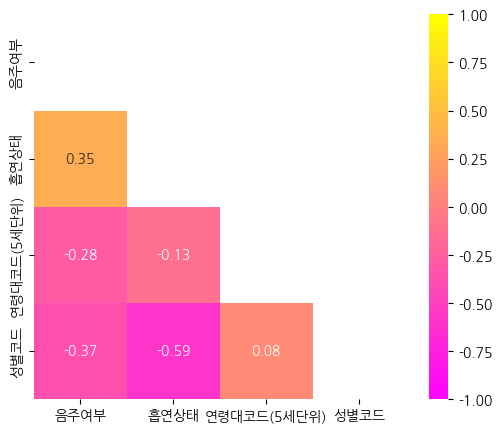

In [83]:
# ANSWER
mask = np.triu(np.ones_like(df_corr, dtype=np))

plt.figure(figsize=(6, 5))
sns.heatmap(df_corr, annot=True, fmt='2.2f', cmap='spring', mask=mask, vmin=-1, vmax=1)

## 📌 Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

In [137]:
columns = ['음주여부', '흡연상태']
df_03 = df[columns]
# df_03은 df에서 추출한 데이터프레임이고 이걸 그대로 아래에서 가공하려고 하면 데이터프레임의 일부분이라 오류가 발생함
# 그래서 .copy()로 복사본을 떠서 df_03에 재할당함
df_03 = df_03.copy()
# 데이터 확인 출력
df_03.head()

,음주여부,흡연상태
0,0.0,3.0
1,0.0,1.0
2,0.0,1.0
3,1.0,1.0
4,0.0,3.0


In [139]:
# 흡연상태 문자열로 상태값 치환
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
df_03['흡연상태'] = df_03['흡연상태'].replace(smoke)
# 음주여부 문자열로 상태값 치환
drink = {0: "안마심", 1: "마심"}
df_03['음주여부'] = df_03['음주여부'].replace(drink)
# 데이터 확인 출력
df_03.head()

,음주여부,흡연상태
0,안마심,흡연중
1,안마심,흡연안함
2,안마심,흡연안함
3,마심,흡연안함
4,안마심,흡연중


In [165]:
# 수업에서는 '가입자일련번호(각 고유번호)'를 넣어서 values에 저걸 넣고 aggfunc=count를 해서 실습한 것 같음
# 찾아보니까 aggfunc=size도 있어서 이걸로 해 봤더니 됨!
# size는 NaN 값을 제외하고 true이거나 false인 값들을 세어준다고 함.

# ANSWER
df_03_pivot = pd.pivot_table(df_03, index='음주여부', columns='흡연상태', aggfunc='size')
df_03_pivot

흡연상태,끊음,흡연안함,흡연중
음주여부,,,
마심,120779,213743,162166
안마심,55334,394503,52845


<Axes: xlabel='흡연상태', ylabel='count'>

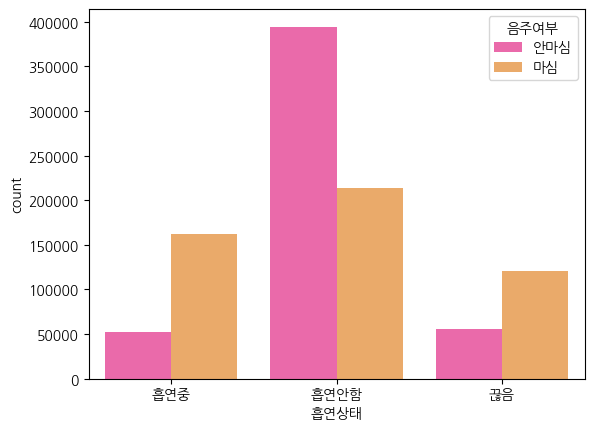

In [187]:
# ANSWER
sns.countplot(data=df_03, x='흡연상태', hue='음주여부', palette='spring')

## 📌 Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

In [36]:
# 필요한 데이터만 가지고 옴
columns = ['체중(5Kg 단위)', '총콜레스테롤', '감마지티피', '음주여부', '흡연상태']
df_04 = df[columns]
df_04 = df_04.copy()
# 데이터 확인 출력
df_04.head()

,체중(5Kg 단위),총콜레스테롤,감마지티피,음주여부,흡연상태
0,65.0,178.0,25.0,0.0,3.0
1,45.0,255.0,10.0,0.0,1.0
2,75.0,211.0,136.0,0.0,1.0
3,55.0,160.0,30.0,1.0,1.0
4,75.0,253.0,68.0,0.0,3.0


In [190]:
# 필요한 데이터에서 문제 조건에 맞는 데이터를 골라냄
df_04_over = df_04.loc[df_04['체중(5Kg 단위)'] >= 120, ['총콜레스테롤', '감마지티피', '음주여부', '체중(5Kg 단위)', '흡연상태']]
df_04_over.head()

,총콜레스테롤,감마지티피,음주여부,체중(5Kg 단위),흡연상태
1219,182.0,47.0,0.0,120.0,3.0
2309,107.0,19.0,0.0,155.0,3.0
3497,214.0,111.0,1.0,120.0,3.0
3685,218.0,58.0,0.0,140.0,2.0
5788,194.0,35.0,0.0,140.0,1.0


In [92]:
# 체중이 120Kg 이상이고 흡연을 하지 않는 사람의 정보
df_04_over_smoke_1 = df_04.loc[(df_04['체중(5Kg 단위)'] >= 120) & (df_04['흡연상태'] == 1), 
['총콜레스테롤', '감마지티피', '음주여부', '체중(5Kg 단위)', '흡연상태']]
df_04_over_smoke_1

,총콜레스테롤,감마지티피,음주여부,체중(5Kg 단위),흡연상태
5788,194.0,35.0,0.0,140.0,1.0
6384,174.0,21.0,0.0,130.0,1.0
13376,195.0,31.0,0.0,120.0,1.0
14024,194.0,87.0,0.0,165.0,1.0
14948,329.0,115.0,0.0,130.0,1.0
...,...,...,...,...,...
986040,172.0,20.0,1.0,120.0,1.0
988371,212.0,106.0,1.0,125.0,1.0
990903,223.0,65.0,1.0,130.0,1.0
993147,157.0,28.0,0.0,125.0,1.0


In [94]:
# 체중이 120Kg 이상이고 흡연을 중단한 사람의 정보
df_04_over_smoke_2 = df_04.loc[(df_04['체중(5Kg 단위)'] >= 120) & (df_04['흡연상태'] == 2), 
['총콜레스테롤', '감마지티피', '음주여부', '체중(5Kg 단위)', '흡연상태']]
df_04_over_smoke_2

,총콜레스테롤,감마지티피,음주여부,체중(5Kg 단위),흡연상태
3685,218.0,58.0,0.0,140.0,2.0
7792,138.0,68.0,0.0,125.0,2.0
17705,190.0,44.0,1.0,125.0,2.0
18009,213.0,93.0,1.0,120.0,2.0
27126,107.0,84.0,1.0,130.0,2.0
...,...,...,...,...,...
988110,255.0,47.0,1.0,120.0,2.0
991336,286.0,117.0,1.0,120.0,2.0
993383,129.0,86.0,1.0,120.0,2.0
993994,217.0,64.0,1.0,140.0,2.0


In [96]:
# 체중이 120Kg 이상이고 흡연을 하는 사람의 정보
df_04_over_smoke_3 = df_04.loc[(df_04['체중(5Kg 단위)'] >= 120) & (df_04['흡연상태'] == 3), 
['총콜레스테롤', '감마지티피', '음주여부', '체중(5Kg 단위)', '흡연상태']]
df_04_over_smoke_3

,총콜레스테롤,감마지티피,음주여부,체중(5Kg 단위),흡연상태
1219,182.0,47.0,0.0,120.0,3.0
2309,107.0,19.0,0.0,155.0,3.0
3497,214.0,111.0,1.0,120.0,3.0
7220,205.0,112.0,1.0,125.0,3.0
7706,239.0,33.0,0.0,120.0,3.0
...,...,...,...,...,...
996169,119.0,130.0,1.0,125.0,3.0
996544,244.0,76.0,1.0,125.0,3.0
996828,194.0,82.0,1.0,120.0,3.0
997414,197.0,62.0,0.0,135.0,3.0


Text(0.5, 1.0, '흡연=끊음')

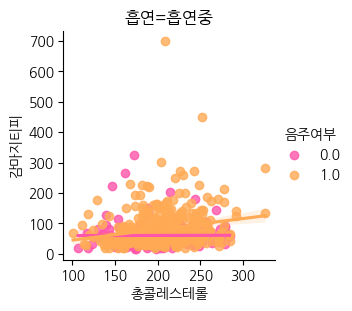

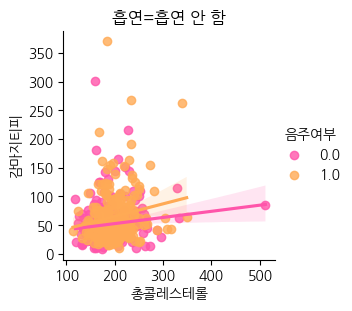

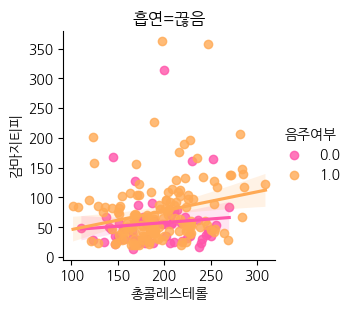

In [188]:
# 똑같은 값이 계속 들어가서 변수로 치환
x = '총콜레스테롤'
y = '감마지티피'
hue = '음주여부'
palette = 'spring'
height = 3

# ANSWER
# 문제랑 완전히 똑같지는 않지만 이것이 한계!
sns.lmplot(data=df_04_over_smoke_3, x=x, y=y, hue=hue, palette=palette, height=height)
plt.title('흡연=흡연중')
sns.lmplot(data=df_04_over_smoke_1, x=x, y=y, hue=hue, palette=palette, height=height)
plt.title('흡연=흡연 안 함')
sns.lmplot(data=df_04_over_smoke_2, x=x, y=y, hue=hue, palette=palette, height=height)
plt.title('흡연=끊음')

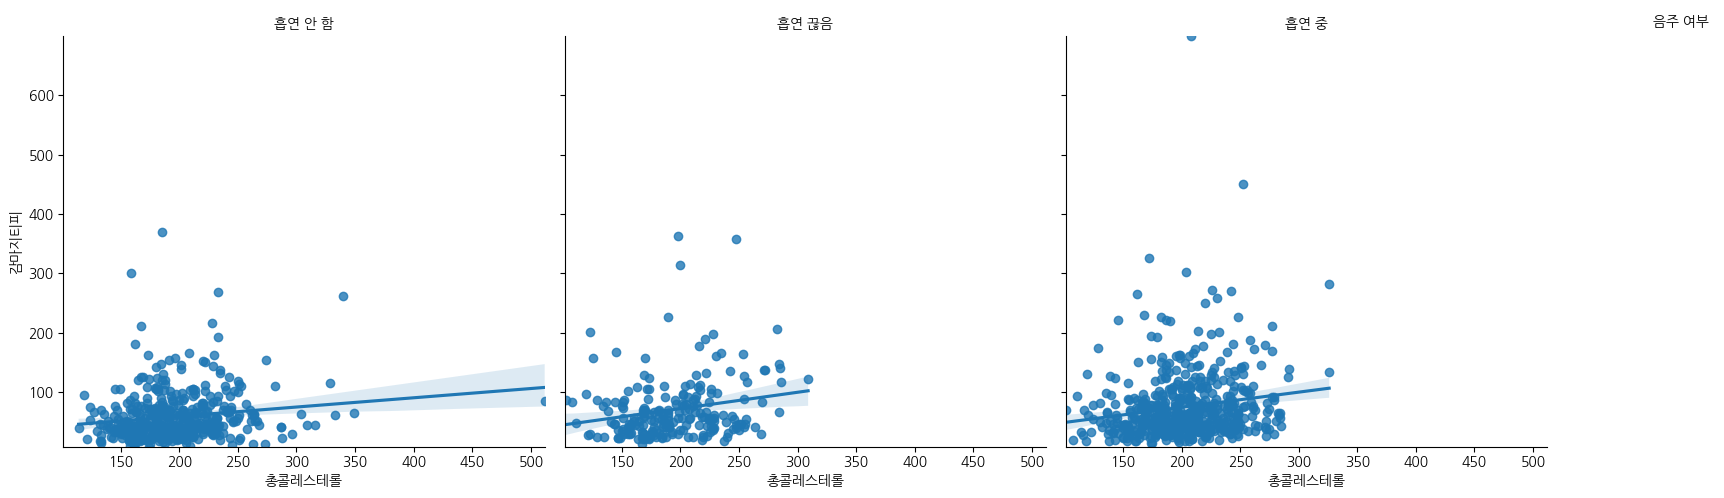

In [182]:
# 모르겠어서 GTP한테 물어봄
# 근데 이러면 css를 어떻게 하는지는? 모르겠다. GPT가 가르쳐준 방법은 lmplot 추가할 때 palette를 넣는 건데 이건 안 됨.
# 서브셋을 하나의 데이터프레임으로 통합
df_combined = pd.concat([
    df_04_over_smoke_1.assign(흡연상태_설명='흡연 안 함'),
    df_04_over_smoke_2.assign(흡연상태_설명='흡연 끊음'),
    df_04_over_smoke_3.assign(흡연상태_설명='흡연 중')
])

# FacetGrid 생성
g = sns.FacetGrid(df_combined, col='흡연상태_설명', col_wrap=3, height=5, sharey=True)

# lmplot 추가
g.map_dataframe(sns.regplot, x='총콜레스테롤', y='감마지티피')

# 레전드 위치 조정 및 제목 설정
g.add_legend(title='음주 여부', bbox_to_anchor=(1.05, 1), loc='upper left')
g.set_titles(col_template="{col_name}")
g.set_axis_labels("총콜레스테롤", "감마지티피")
g.set(xlim=(df_combined['총콜레스테롤'].min(), df_combined['총콜레스테롤'].max()),
     ylim=(df_combined['감마지티피'].min(), df_combined['감마지티피'].max()))
plt.tight_layout()
plt.show()

## 📌 Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

In [218]:
# 필요한 데이터만 가지고 옴
columns = ['연령대코드(5세단위)', '시력(좌)', '시력(우)', '성별코드']
df_05 = df[columns]
df_05 = df_05.copy()
# 연령대코드를 문자열로 치환
df_05['연령대코드(5세단위)'] = df['연령대코드(5세단위)'].map(age_code)
df_05.head()

,연령대코드(5세단위),시력(좌),시력(우),성별코드
0,60~64세,1.0,1.2,1
1,35~39세,1.2,1.0,2
2,35~39세,1.0,0.8,1
3,55~59세,0.9,1.0,2
4,35~39세,1.5,1.5,1


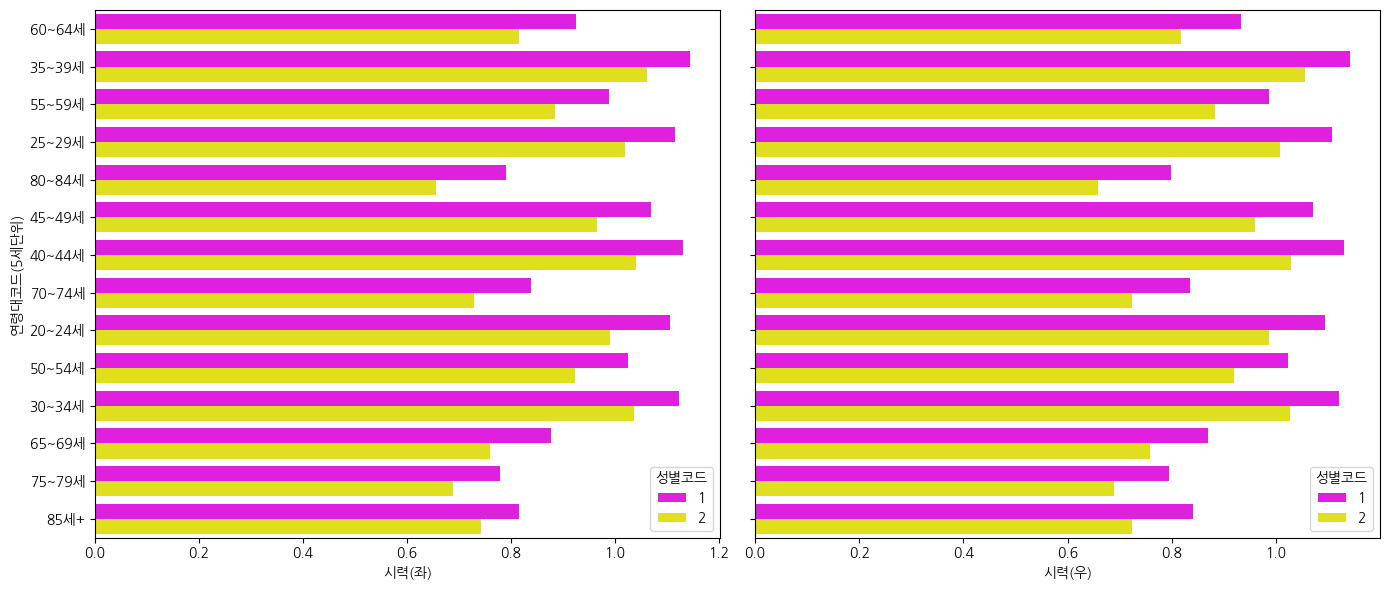

In [236]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(data=df_05, x='시력(좌)', y='연령대코드(5세단위)', hue='성별코드', errorbar=None, palette='spring', ax=axes[0])
sns.barplot(data=df_05, x='시력(우)', y='연령대코드(5세단위)', hue='성별코드', errorbar=None, palette='spring', ax=axes[1])

plt.tight_layout()
plt.show()